In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import math



sns.set(style="whitegrid")

In [199]:
df = pd.read_csv('F:/MyProjects/PraxisProjects/hospital-readmission-risk-prediction/notebooks/dataset/hospital_readmissions.csv')
display(df.shape)
display(df.columns)
df.head()

(25000, 17)

Index(['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test',
       'A1Ctest', 'change', 'diabetes_med', 'readmitted'],
      dtype='object')

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [200]:
print(df.duplicated().sum())

0


In [201]:
print(df.isnull().sum().sum())

0


In [202]:
df['readmitted'].value_counts(normalize=True)

readmitted
no     0.52984
yes    0.47016
Name: proportion, dtype: float64

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

<Axes: >

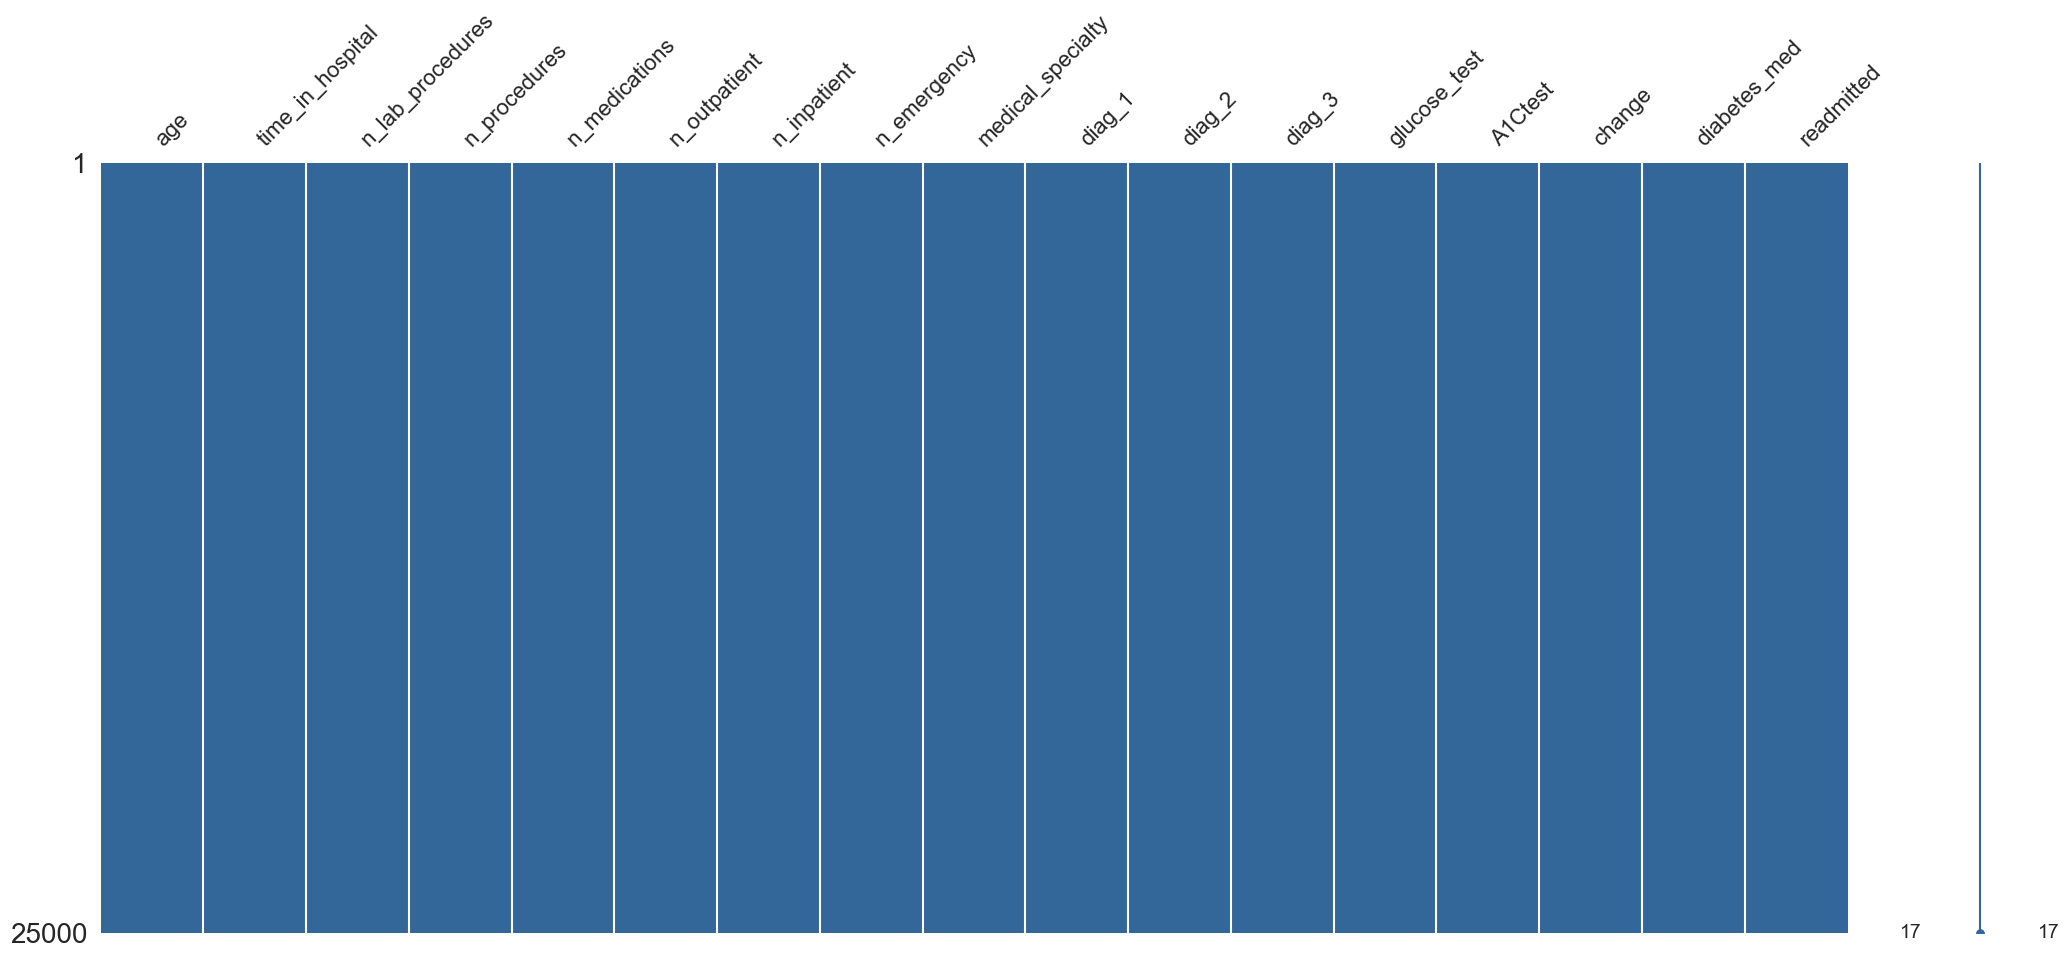

In [204]:
msno.matrix(df, color=(0.2, 0.4, 0.6))

In [205]:
numeric_cols = df.select_dtypes(include=['float','int64']).columns
display(len(numeric_cols))
display(numeric_cols)

7

Index(['time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications',
       'n_outpatient', 'n_inpatient', 'n_emergency'],
      dtype='object')

In [206]:
cat_cols = df.select_dtypes(include=['object']).columns
display(len(cat_cols))
display(cat_cols)

10

Index(['age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3',
       'glucose_test', 'A1Ctest', 'change', 'diabetes_med', 'readmitted'],
      dtype='object')

In [207]:
## Analyzing only numeric columns

In [208]:
display(df[numeric_cols].shape)
display(df[numeric_cols].columns)
df[numeric_cols].head()

(25000, 7)

Index(['time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications',
       'n_outpatient', 'n_inpatient', 'n_emergency'],
      dtype='object')

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
0,8,72,1,18,2,0,0
1,3,34,2,13,0,0,0
2,5,45,0,18,0,0,0
3,2,36,0,12,1,0,0
4,1,42,0,7,0,0,0


In [209]:
df[numeric_cols].describe()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


<Figure size 1200x500 with 0 Axes>

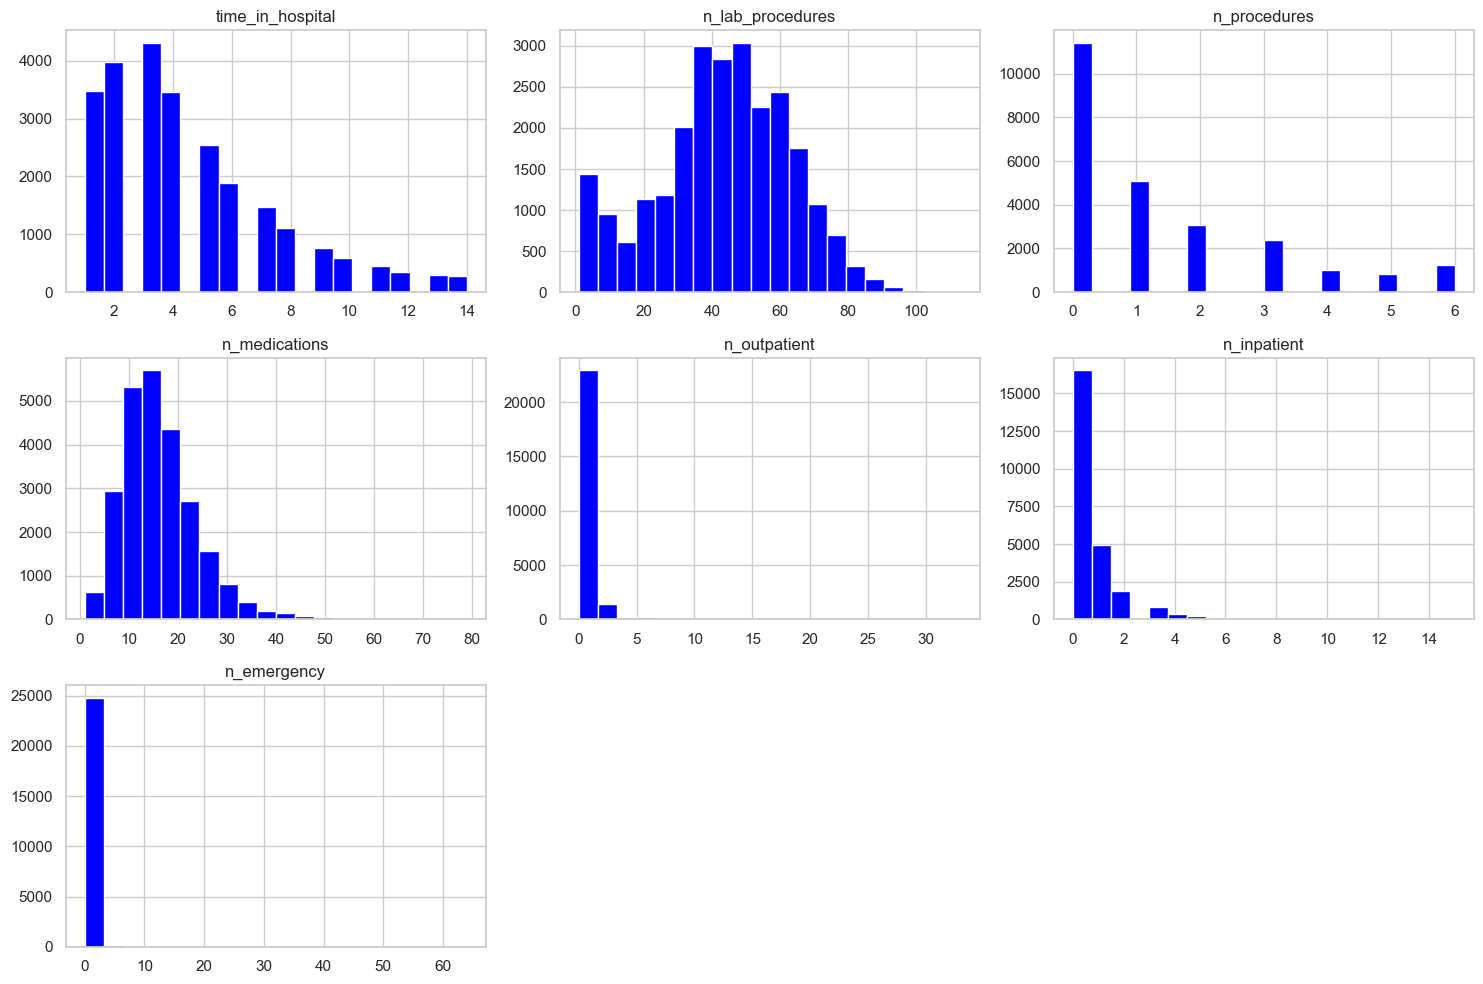

In [210]:
plt.figure(figsize=(12,5))
df[numeric_cols].hist(bins=20, figsize = (15,10), color='blue', edgecolor ='white')
plt.tight_layout()
plt.show()

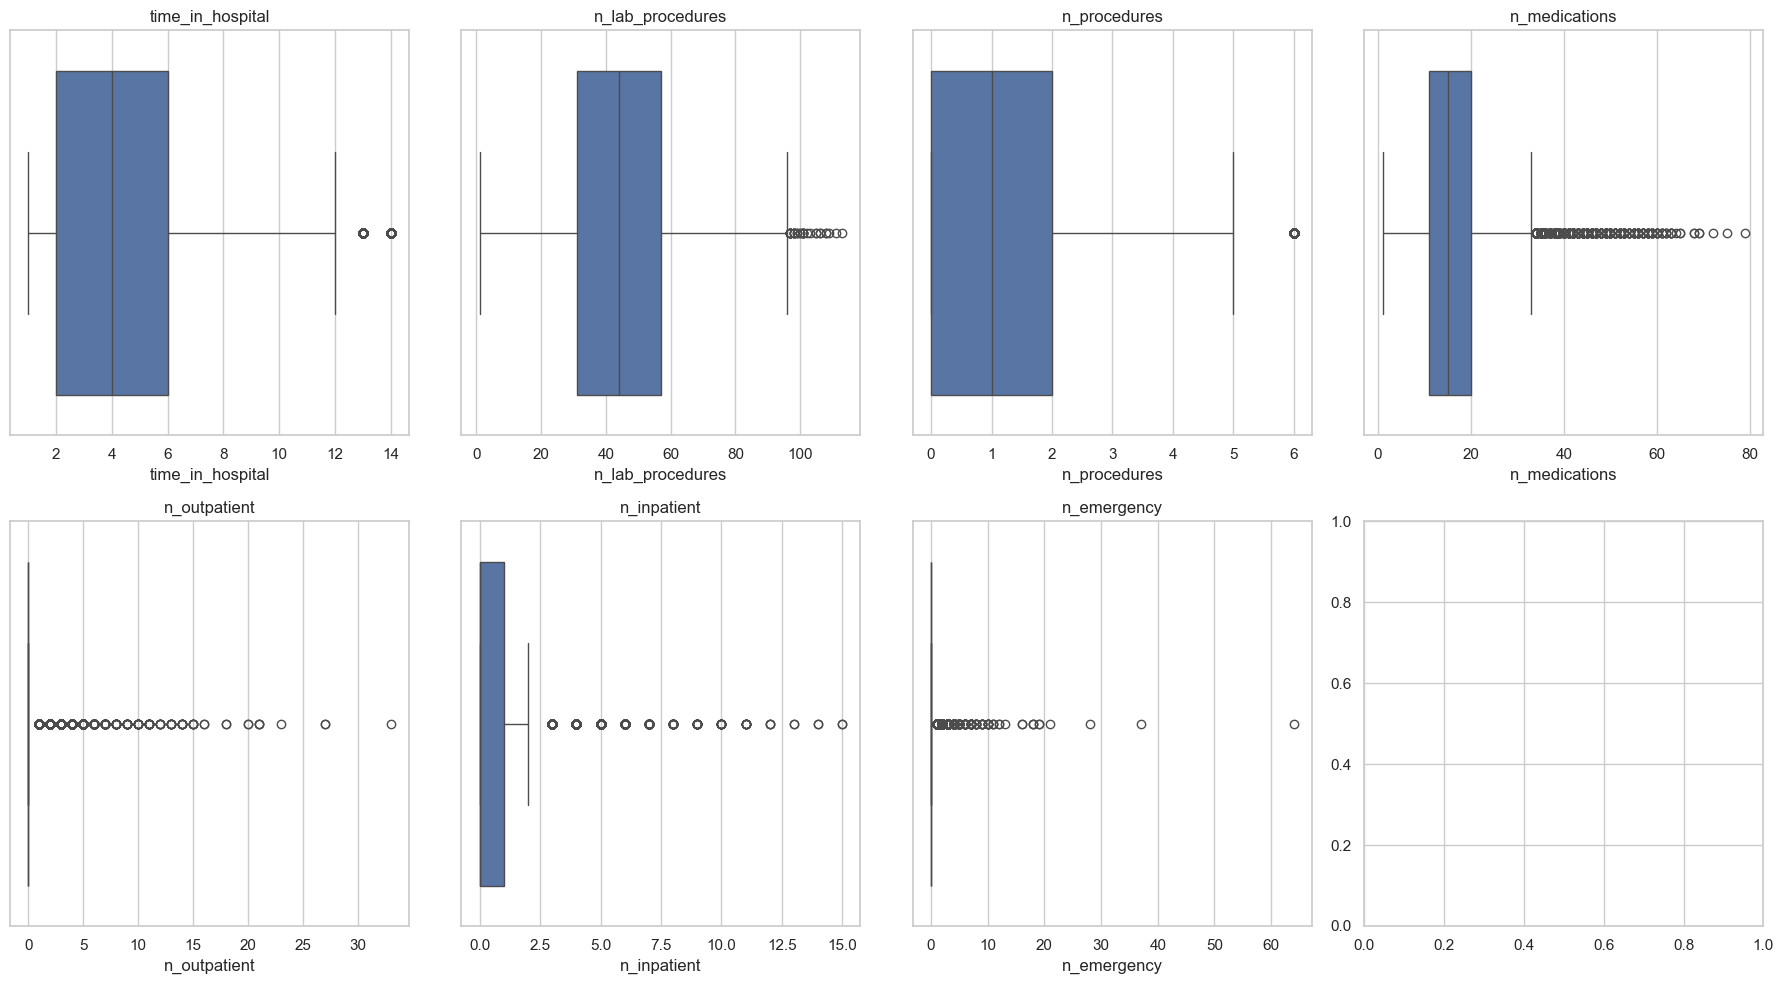

In [211]:
# check for oputliers

n_cols = 4 
n_rows = math.ceil(len(numeric_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i], showfliers=True)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [212]:
## Analyzing cat columns

In [213]:
display(len(cat_cols))
display(cat_cols)

10

Index(['age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3',
       'glucose_test', 'A1Ctest', 'change', 'diabetes_med', 'readmitted'],
      dtype='object')

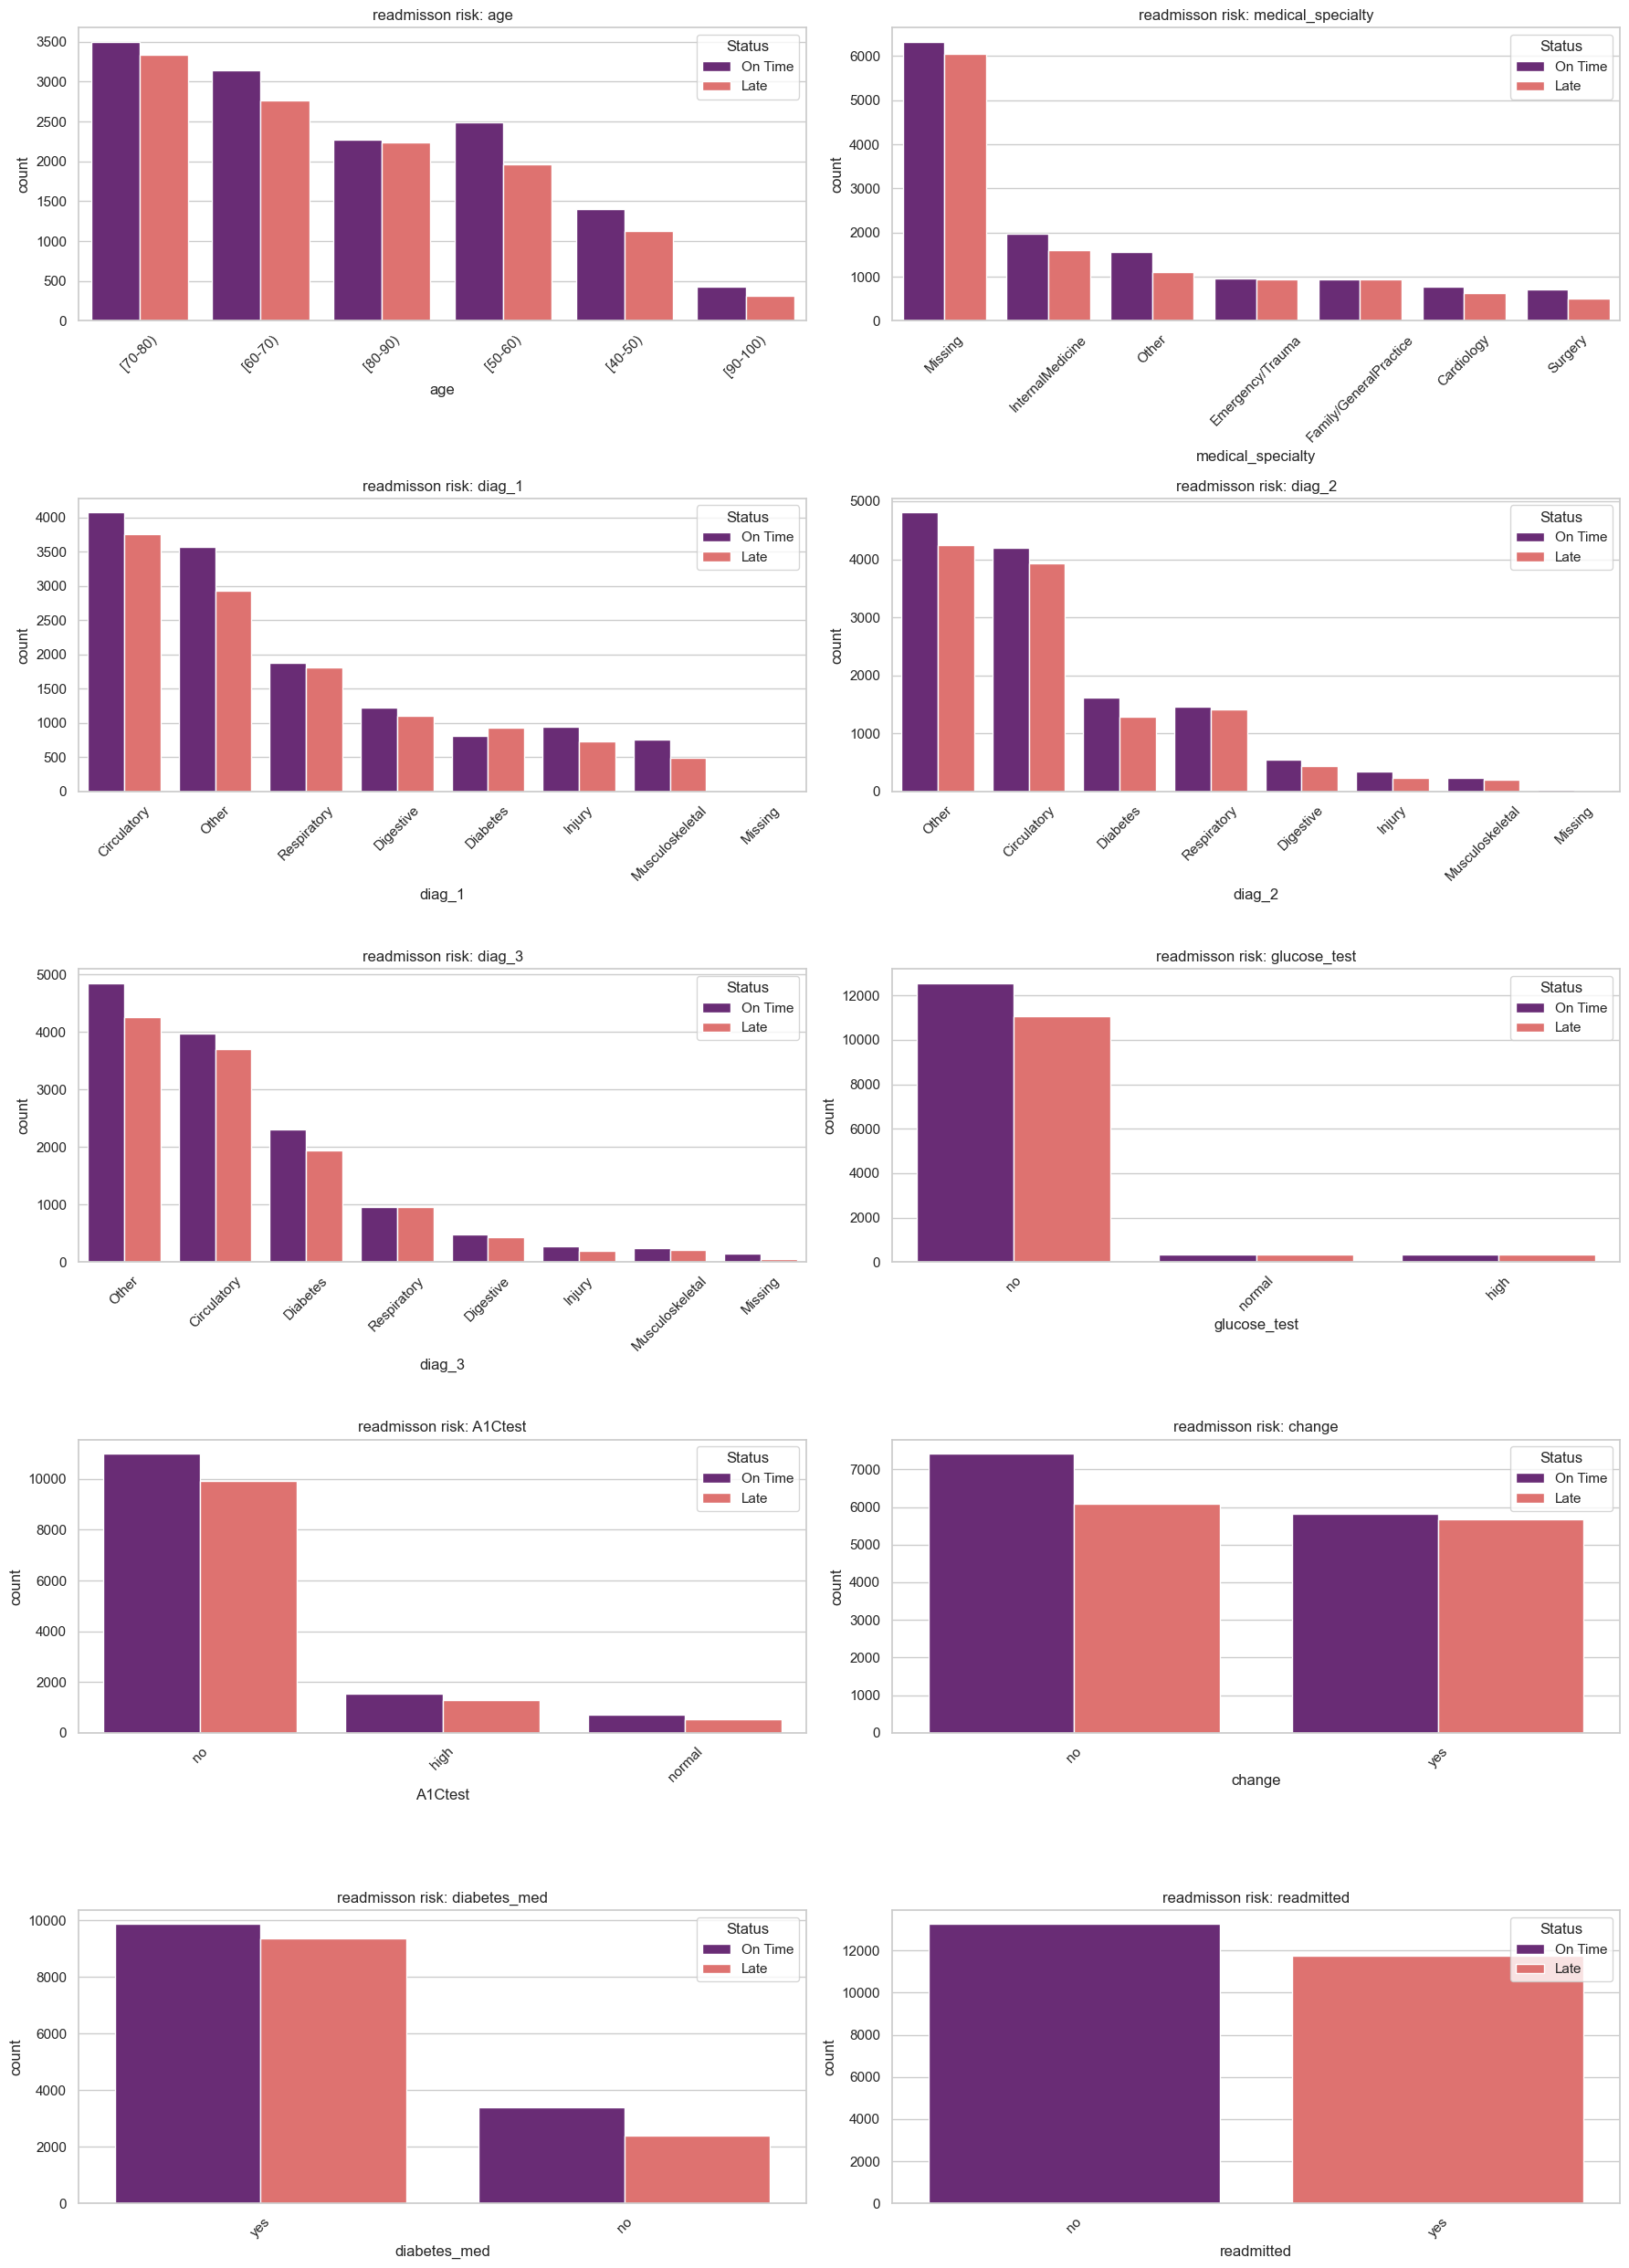

In [214]:
n_cols = 2
n_rows = math.ceil(len(cat_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):

    top10 = df[col].value_counts().nlargest(10).index
    data_to_plot = df[df[col].isin(top10)]
    
    sns.countplot(
        data=data_to_plot,
        x=col,
        hue='readmitted',
        order=top10,
        palette='magma',
        ax=axes[i]
    )
    
    axes[i].set_title(f'readmisson risk: {col}', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Status', labels=['On Time', 'Late'], loc='upper right')


plt.tight_layout()
plt.show()

In [215]:
## feature engineering

In [216]:
df["readmitted"] = df["readmitted"].map({"yes": 1, "no": 0})


In [217]:
df['age'].value_counts()

age
[70-80)     6837
[60-70)     5913
[80-90)     4516
[50-60)     4452
[40-50)     2532
[90-100)     750
Name: count, dtype: int64

In [218]:
age_map = {
    "[0-10)": 0, "[10-20)": 1, "[20-30)": 2, "[30-40)": 3,
    "[40-50)": 4, "[50-60)": 5, "[60-70)": 6,
    "[70-80)": 7, "[80-90)": 8, "[90-100)": 9
}
df["age_ord"] = df["age"].map(age_map)

In [219]:
df["total_visits"] = (
    df["n_outpatient"] +
    df["n_inpatient"] +
    df["n_emergency"]
)

In [220]:
df["emergency_ratio"] = df["n_emergency"] / (df["total_visits"] + 1)

In [221]:
df["high_inpatient_flag"] = (df["n_inpatient"] > 1).astype(int)

In [223]:
display(df.shape)
df.head()

(25000, 21)

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,...,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted,age_ord,total_visits,emergency_ratio,high_inpatient_flag
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,...,Other,no,no,no,yes,0,7,2,0.0,0
1,[70-80),3,34,2,13,0,0,0,Other,Other,...,Other,no,no,no,yes,0,7,0,0.0,0
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,...,Circulatory,no,no,yes,yes,1,5,0,0.0,0
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,...,Diabetes,no,no,yes,yes,1,7,1,0.0,0
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,...,Respiratory,no,no,no,yes,0,6,0,0.0,0


In [193]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

if 'readmitted_binary' in numerical_features:
    numerical_features.remove('readmitted_binary')
if 'readmitted_binary' in categorical_features:
    categorical_features.remove('readmitted_binary')

print(f"Numerical features: {len(numerical_features)}")
print(f"Categorical features: {len(categorical_features)}")
print(f"Total features: {len(numerical_features) + len(categorical_features)}")

Numerical features: 12
Categorical features: 9
Total features: 21


f:\MyProjects\PraxisProjects\hospital-readmission-risk-prediction\myvenv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


ANOVA F-TEST RESULTS (Numerical Features)
            Feature     F_Score       P_Value
         readmitted         inf  0.000000e+00
        n_inpatient 1181.972245 3.948076e-253
       total_visits 1129.928997 2.554365e-242
high_inpatient_flag  882.543787 1.257507e-190
       n_outpatient  230.022717  1.001795e-51
        n_emergency  220.554425  1.115309e-49
    emergency_ratio  202.890449  7.390476e-46
       n_procedures   49.526494  2.007615e-12
   time_in_hospital   46.612480  8.848708e-12
      n_medications   34.030089  5.493484e-09
   n_lab_procedures   27.203451  1.845898e-07
            age_ord   22.954457  1.668363e-06


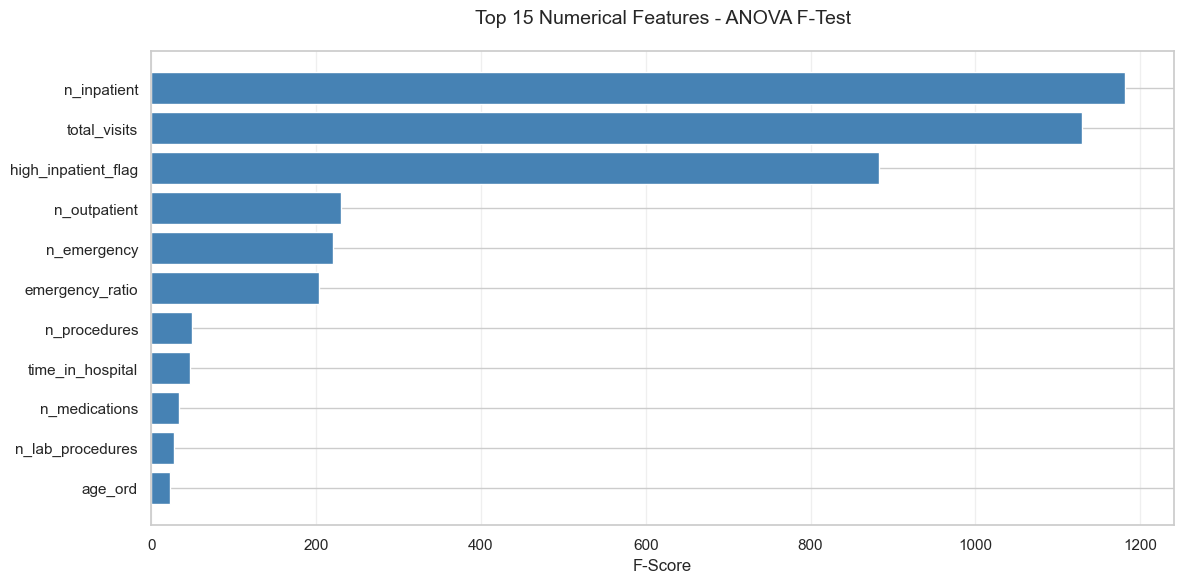


✅ Significant numerical features (p < 0.05): 12
['readmitted', 'n_inpatient', 'total_visits', 'high_inpatient_flag', 'n_outpatient', 'n_emergency', 'emergency_ratio', 'n_procedures', 'time_in_hospital', 'n_medications', 'n_lab_procedures', 'age_ord']


In [ ]:
from sklearn.feature_selection import f_classif

X_numerical = df[numerical_features]
y = df['readmitted']

f_scores, p_values = f_classif(X_numerical, y)

anova_results = pd.DataFrame({
    'Feature': numerical_features,
    'F_Score': f_scores,
    'P_Value': p_values
}).sort_values('F_Score', ascending=False)

print("ANOVA F-TEST RESULTS (Numerical Features)")
print(anova_results.to_string(index=False))

plt.figure(figsize=(12, 6))
plt.barh(anova_results['Feature'][:15], anova_results['F_Score'][:15], color='steelblue')
plt.xlabel('F-Score')
plt.title('Top 15 Numerical Features - ANOVA F-Test', fontsize=14, pad=20)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

significant_numerical = anova_results[anova_results['P_Value'] < 0.05]['Feature'].tolist()
print(f"\nSignificant numerical features (p < 0.05): {len(significant_numerical)}")
print(significant_numerical)


CHI-SQUARE TEST RESULTS (Categorical Features)
          Feature  Chi2_Score      P_Value
           change   25.205415 5.153729e-07
           diag_1   24.472790 7.536674e-07
     diabetes_med   22.291670 2.342205e-06
              age   16.934625 3.868939e-05
medical_specialty    4.835449 2.788038e-02
           diag_3    0.588568 4.429733e-01
          A1Ctest    0.159586 6.895378e-01
           diag_2    0.140688 7.075975e-01
     glucose_test    0.103668 7.474719e-01


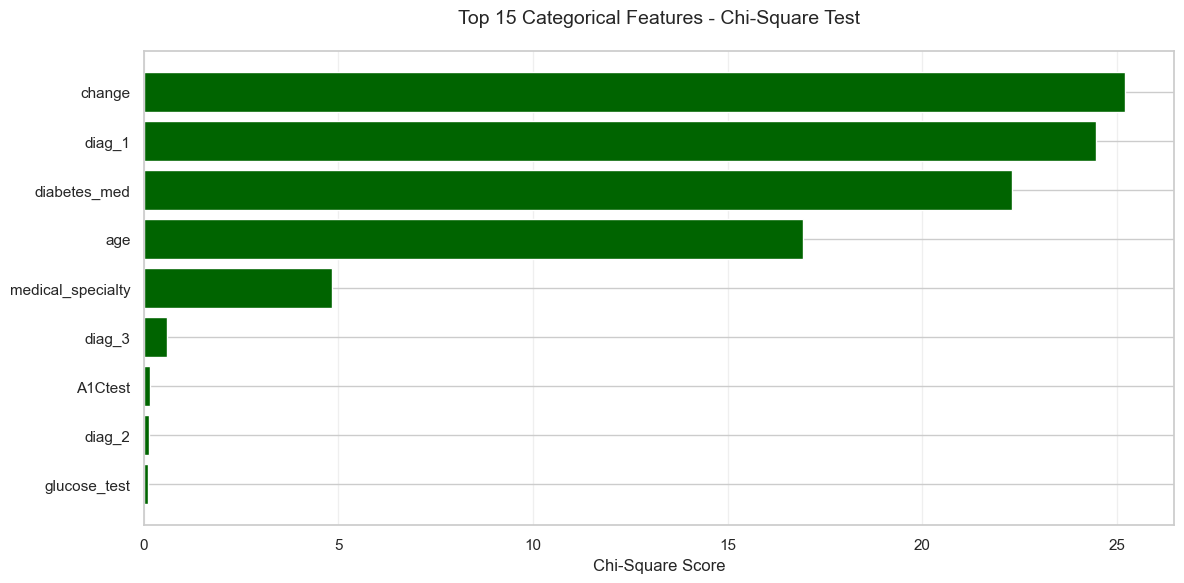


✅ Significant categorical features (p < 0.05): 5
['change', 'diag_1', 'diabetes_med', 'age', 'medical_specialty']


In [ ]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
X_categorical = df[categorical_features].copy()
y = df['readmitted']

le = LabelEncoder()
X_categorical_encoded = X_categorical.apply(lambda col: le.fit_transform(col.astype(str)))

chi_scores, chi_p_values = chi2(X_categorical_encoded, y)

chi_results = pd.DataFrame({
    'Feature': categorical_features,
    'Chi2_Score': chi_scores,
    'P_Value': chi_p_values
}).sort_values('Chi2_Score', ascending=False)

print("\n" + "="*60)
print("CHI-SQUARE TEST RESULTS (Categorical Features)")
print("="*60)
print(chi_results.to_string(index=False))


plt.figure(figsize=(12, 6))
plt.barh(chi_results['Feature'][:15], chi_results['Chi2_Score'][:15], color='darkgreen')
plt.xlabel('Chi-Square Score')
plt.title('Top 15 Categorical Features - Chi-Square Test', fontsize=14, pad=20)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

significant_categorical = chi_results[chi_results['P_Value'] < 0.05]['Feature'].tolist()
print(f"\nSignificant categorical features (p < 0.05): {len(significant_categorical)}")
print(significant_categorical)

In [192]:
df.to_csv("data_final.csv",index=False)